# Classification Predict Team ZF_1

© Explore Data Science Academy
### Team Members
* Bodine Mazibuko b.n.mazibuko9@gmail.com
* Kennedy Ombedho kencarsonbonyo@gmail.com
* Adetunji Emmanuel adegbem@gmail.com
* Clara Ogechi Raphael c.raphael@agnosyshealth.com
* Rotimi Oluwabusola oluwabusolaseyi@gmail.com

---
### Honour Code

WE **Team ZF 1**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

&ensp;
  
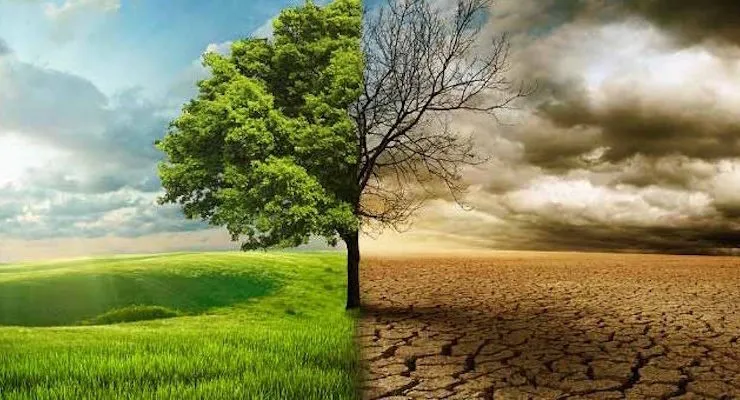
 ## Predict Overview: Climate Change Believe Analysis





As there is an uptrend in awareness on climate change and the accompany bad effects, many people and companies alikes are working to reduce there environmental impact or carbon footprint.

* In this effect company ABC Inc as hired our team `ZF1` to look into how there customer and potential customers percive this subject (climate change). There goal being to align there company values with customers perspective, so as to ultimately not lose there customer base while trying to reduce the company carbon footprit.

* The Team ZF1 will used the data provided by the company to gain insight into the dynamics of the tweets, what are the majority sentiments, keywords associated with this sentiments and what are the `popular topics, subjects, personality` surrounding climate change.
* We will futher use Machine Learning model to classify whether or not a person believes in climate change, based on their novel tweet data.

By providing these information above, we will be able to give the company access to what their customers and potential one's orientation to climate change, and thus increasing the marketing team insights and having better future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Cleaning</a>

<a href=#five>5. Engineering Features</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. References</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


### 1.1  Setting up comet

Comet is a platform that comes in handy when carrying out a machine learning project. It is useful for tracking machine learning models performances along the lifecycle of the project. This is important to keep track of our machine learning model performance across each steps taken and project lifecycle as well. In Comet, each tracking process is called an Experiment.

For this project, we will use Comet to keep track of any changes and performances of our machine learning models.

In [1]:
#importing comet for tracking
from comet_ml import Experiment

In [2]:
# Setting the API key (saved as environment variable)
#initialize experiment for Comet
experiment = Experiment(
    api_key="mn7gOjsbMtlJODxIBDP2G0w6e",
    project_name="edsa-climate-change-belief-analysis",
    workspace="roceey",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/roceey/edsa-climate-change-belief-analysis/c9550c0fcbac4deab2a728be8101aeb6



The above cell is used to initialize a tracking process on `Comet` for our model.

### 1.2  Setting up necessary libraries

After setting up `Comet`, the next step is to load in all the required packages for data wrangling, data visualization,  machine learning model building and evaluation as well as other utilities that will be needed in the course of the project.

In [1]:
# importing basic and fundamental libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import pickle
import pycountry

from wordcloud import WordCloud

# libraries for NLP
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

# importing libraries for utility from sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

# importing libraries for modelling form sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# libraries to check model metrics from sklearn
from sklearn.metrics import confusion_matrix, f1_score, classification_report,accuracy_score

# Enable interactive visualisations in Jupyter
from ipywidgets import interact, interact_manual, widgets
import plotly.express as px

# Suppressing unnwarranted warnings
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 2.1 Dataset description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:


**Class Description**
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change


**Variable definitions**
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

In [2]:
# Importing train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')
pd.set_option('max_colwidth', 1)# for a wider view of our data in second column


Loading of the dataset (using pandas) that will be used throught the project, which include;
- The train dataset which have a label column describing the sentiment of each tweet and 
- A test dataset which has no sentiment label and will be use to test our model predict power

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


After loading in our dataset, we begin with the vital component EDA to better understand the dataset we are working with and, to gain insight about the features and labels by performing Univariate or Multivariate , Non-graphical or Graphical Analysis"

We took a quick look at the first few rows of the training and testing dataset to have an overview of our features and labels, (using pd.info() and pd.head() method)
&emsp;

In [3]:
# displaying a few rows of both dataset
display(train_df.head())
display(test_df.head())

sentiment  \
0  1           
1  1           
2  2           
3  1           
4  1           

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1  It's not like we lack evidence of anthropogenic global warming                                                                                 
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3  #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD                                            
4  RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                     

   tweetid  
0  625221   
1  126103   
2  698562   
3  573736   
4  466954

message  \
0  Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq                     
1  Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj          
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4  RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican                                                              

   tweetid  
0  169760   
1  35326    
2  224985   
3  476263   
4  872928

In [4]:
# checking dataset information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The dataset contains three features
- the dataset consist of `15819` rows
- there seems to be no null values


&ensp;

### 3.1  Checking class balance

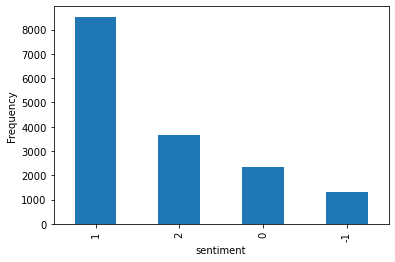

In [5]:
# plotting the class distribution
train_df.sentiment.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('sentiment');

From the distribution plot above, we can see that the class distribution has wide variations and it is very imbalance. Although, most tweets support the man-made climate change which is represented by `1` while we have a fewer anti-climate change tweets.


&emsp;

In [6]:
# creating a sentiment_map
sentiment_dict = {'Anti-Climate':-1, 'Neutral':0, 'Pro-Climate':1, 'News-Fact':2}


### 3.2  Hashtag and mention per sentiment 


To delve further into the dataset and get insights into the hashtags and mentions for each sentiment, the `tag_extractor`, `bag_of_words_count`, `sentiment_word_extract`, `word_visual`, functions were defined. This will aid our exploration into the most frequent hashtag and mentions for each of the sentiments.

In [7]:
def tag_extractor(tweet, type_word: str):
    """ The function extract a pattern from a string of words"""
    pattern = r'{}\w+'.format(type_word)
    result = ' '.join(re.findall(pattern, tweet))
    return result

# Implimentation of the function above
train_df['hash_tag'] = train_df.message.apply(tag_extractor, args='#')
train_df['mentions'] = train_df.message.apply(tag_extractor, args='@')

The function is to extract mentions or hashtag in the tweet

In [8]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary
        with each word as a key, and the value represents the number of
        times that word appeared"""
    words = words.split()
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict


The function is use to store frequency of words using the dictionary data structure

In [9]:
def sentiment_word_extract(sentiment_cat, coln_name, iter_hash_num):
    """This use to compile all the word and there frequency 
    in the individual category found in a particular column"""
    count = 0
    result = {}
    type_labels = train_df.sentiment.unique()
    sentiments = {}
    df_grp = train_df.groupby('sentiment')
    for pp in type_labels:
        sentiments[pp] = {}
        for row in df_grp.get_group(pp)[coln_name]:
            sentiments[pp] = bag_of_words_count(row, sentiments[pp])
    for w in sorted(sentiments[sentiment_cat], key=sentiments[sentiment_cat].get, reverse=True):
        count += 1
        result[w] = sentiments[sentiment_cat][w]
        if count == iter_hash_num:
            break
    return result


The function is to group the tweet by sentiment and extract each word in the tweet with there corresponding frequency with the aid of the `bag_of_words_count` function created earlier

In [10]:
def word_visual(sentiment_cat, coln_name, iter_hash_num):
    """This function is used to creat two visuals a pie chart and a word could base on the frequency """
    output = sentiment_word_extract(sentiment_cat, coln_name, iter_hash_num)
    df = pd.DataFrame({
                    'Frequency': output.values(),
                    'Hash-Tag': output.keys()})

    fig, ax = plt.subplots(1,2, figsize=(15, 7))
    sns.barplot(data=df, y='Frequency', x='Hash-Tag', ax=ax[0])
    wordcloud = WordCloud(background_color = 'white',
                          width = 512,
                          height = 384).generate(' '.join(output.keys()))
    ax[1].imshow(wordcloud)
    xlabels = df['Hash-Tag']
    ax[0].tick_params(axis='x', labelrotation=75)
    ax[1].axis("off")
    fig.tight_layout()
    plt.show()


The function is use to plot viusals (`barchart and wordcloud`) for the different sentiments

In [11]:
from ipywidgets import interact, interact_manual, widgets
def iplotting(type_word: dict={'Hash Tags':'hash_tag', 'Mentions':'mentions'}):   
    slider = widgets.IntSlider(value=10, min=1, max=20, step=1)
    @interact_manual
    def selecting(Frequency=slider, type_select=type_word.keys(), sentiment=sentiment_dict.keys()):
        vis = word_visual(sentiment_dict[sentiment], type_word[type_select], iter_hash_num=Frequency)
iplotting()

interactive(children=(IntSlider(value=10, description='Frequency', max=20, min=1), Dropdown(description='type_…

### Hash-Tags
* The name `Trump` appear in all sentiments and this obivous because he was the president of united state of america (USA) at the time of the tweet data collection and this shows that the `President` of `USA` matters in the topic surrounding climate change
    * `Maga` is another word which also means `Make America Great Again` which also a pointer that america and americans are more involved in the talk about climate change<br><br>
* `ParisAgreement/ParisAccord` also known as `COPP 22` is another `hot` hash-tag since it plays a major role in addressing climate change; _The Paris Agreement is a legally binding international treaty on climate change. It was adopted by 196 Parties at COP 21 in Paris, on 12 December 2015_<br><br>
* Obivous word that are also popular in all the sentiments tweets are `climatechange`, `climate`<br><br>
* A stand out `hash-tag` is `QandA`, this perculiar to the `neutral and anti-climate` tweet, this shows that though they may not support the believe of climate change, most are curious in learning more about the subject<br><br>
* **Anti-Climate tweets:** We have hash-tags such as `fakenews and ClimateScam` depicting there unbelieve<br><br>
* **Neutral tweets:** Are filled with hash-tags (such as `ApriFoolsDay, 4corners, GameofThrones, and amReading`) that are not related to climate change, confirming that the user are less concern about the subject matter<br><br>
* **Pro-Climate tweets:** We have so many hash-tags that shows this particular set of tweet speak and concerned about the climate change such as; `ClimateCount, Envirnoment, IamVotingBecause, globalwarming e.t.c.`. All this shows that a tweet support the subject `Climate-change`<br><br>
* **News fact tweets:** Hash-Tag `China` stood out in the `news` type of tweet and this depict there are more reportings about china and it contribution (postive or negatively) to climate change
    * Other popular tag associated with this type of tweets are `news, science and CNN` all this afirm that this tweet are more about fact about climate change 

### Mentions
Note: All the sentiment in the mention anaylsis shows great similarities except for `News-Fact`<br><br>
* As we have in the hash-tags the name `Trump` appears in all the sentiments types except for `News-Fact sentiments`<br><br>
* Other mentions are mostly important people in america, such as `KamalaHarris`, United state sentators (`SenSanders, SenatorMRoberts e.t.c`), this further show those people/country leading the talk about `climate change`<br><br>
* **News fact tweets:** Since it not really a sentiment but facts about climate change, it mentions are mostly `TV` stations `blogs` `newspapers` and `websites`
    * This mentions are `CNN`, `Reuters`, `nytimes`, `guardian`, `washingtonpost` e.t.c<br><br>

### 3.3  Countries involved in Climate Change

Part of our exploration involved finding out the countries involved in climate change from our tweet data. To acheive that, we had to extract the countries information from each tweets by defining a list of countries, extracting the countries from the tweet using `cleaning_country` function and creating a plot to visualize the frequency those countries extract using `country_plot` function.

In [12]:
country_list = []
for country in pycountry.countries:
    country_list.append(country.name)

In [13]:
country_list = list(map(lambda x: x.lower(),country_list))

In [14]:
def cleaning_country(tweet):
    """
    This function helps to extract a country from each of the tweet and returns the country
    """
    rem_punct = re.sub(r'[^a-zA-Z ]', '', tweet)
    word_split = rem_punct.lower().split()
    country_set = set(country_list)
    country_ext = ' '.join([t for t in word_split if t in country_set])
    return country_ext

# Implementation of the tweet above
train_df['country'] = train_df.message.apply(cleaning_country)


In [15]:
def country_plot(sentiment: dict):
    """ 
    This function plots a bar chart of frequency of countries involved in climate change for each sentiment
    """
    slider = widgets.IntSlider(value=10, min=1, max=20, step=1)
    @interact_manual
    def selecting(Frequency=slider, sentiment=sentiment_dict.keys()):
        country_sentiment = train_df['country'][train_df['sentiment'] == sentiment_dict[sentiment]]
        df = country_sentiment.value_counts().to_frame().iloc[1:Frequency]
        fig = px.bar(df, x=df.index, y='country', labels={'index':'Country', 'country': 'Count'})
        fig.show()
        
# calling the function above to plot our visual
country_plot(sentiment_dict)

interactive(children=(IntSlider(value=10, description='Frequency', max=20, min=1), Dropdown(description='senti…

Top country more involved in climate change
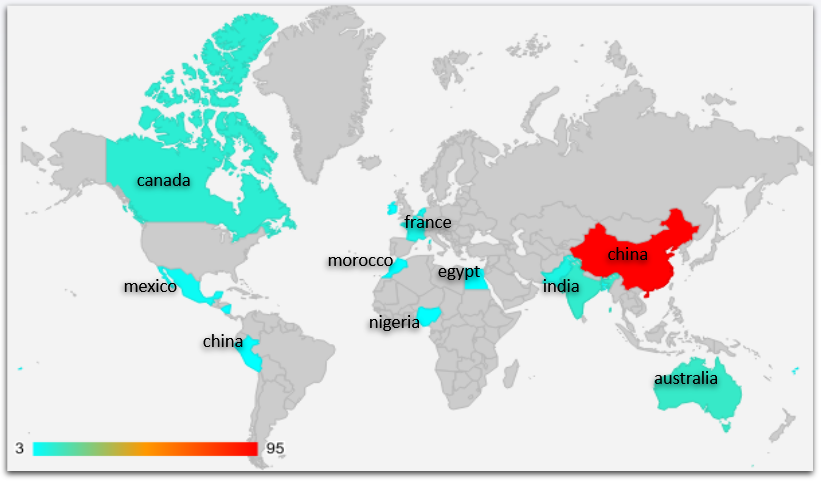

From our plot above, we can tell from our tweets that China has more involvement with the Climate change concept.

<a id="four"></a>
## 4. Data cleaning and Wrangling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 4.1 Dealing with data imbalance 

To deal with data imbalance and avoid bias predictions from the models we will build later on, we employed the resampling (Upsampling and Downsampling) method. 

dual-sampling:


sentiment  \
10443 -1           
5461   0           
6532   0           
1774  -1           
636    0           

                                                                                                                                            message  \
10443  RT @SteveSGoddard: I've been hearing this global warming idiocy for 40 years, and nothing is changing. At what point does this scam en…        
5461   G20 rolls back on free trade &amp; climate change after US pressure https://t.co/IvknPt6AY8 + import restrictions for booze etc after brexit   
6532   Consensus at #ndpldr – The 2 major issues facing Canada today are climate change and economic inequality                                       
1774   RT @steph93065: Libs are so mad that we don't have to buy into their climate change cult nonsense anymore.                                     
636    @justin_kanew @realDonaldTrump \n Keep on it. heard something like this week's ago. It's not just climate change info.'they' are taking down   

       tweetid hash_tag                        mentions country  
10443  733706            @SteveSGoddard                          
5461   636158                                                    
6532   337622   #ndpldr                                  canada  
1774   910367            @steph93065                             
636    7061              @justin_kanew @realDonaldTrump

Class with their new resampled sizes
 1    4000
 2    4000
 0    4000
-1    4000
Name: sentiment, dtype: int64


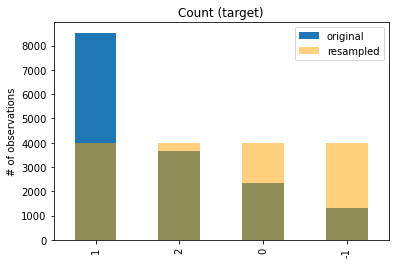

In [16]:
class_size = 4000 # setting an average or fixed size for each category in 'sentiment'
dd = train_df.sentiment.value_counts() # getting category name and their size
appended_data = [] # creating an empty list to append all category after resampling

# Creating a for-loop to resample and append to a list
for index, size in dd.items():
    if size < class_size: # setting condition to check if to downsampling or otherwise
        temp_pd = resample(train_df[train_df['sentiment']==index],
                          replace=True, # sample with replacement
                          n_samples=class_size, # match number in majority class
                          random_state=27)
    else:
        temp_pd = resample(train_df[train_df['sentiment']==index],
                          replace=False, # sample with replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in minority class
                          random_state=27)
# Appending each category after resampling
    appended_data.append(temp_pd)

# Creating a new dataframe and viewing
df_train_sampled = pd.concat(appended_data, axis=0)
print('dual-sampling:')
display(df_train_sampled.sample(5))
print('Class with their new resampled sizes')
print(df_train_sampled.sentiment.value_counts())

# ploting the old and new graph frequency
ax = train_df.sentiment.value_counts().plot(kind='bar')
df_train_sampled.sentiment.value_counts().plot(kind='bar', title='Count (target)', 
                                               ax=ax,color='orange', alpha=0.5);
plt.xticks(range(len(dd)),dd.index)
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

### 4.2 Creating a function to clean the `message`

The function uses patterns with regular expression, 'stopwords' from natural language processing (nltk) and  tokenize using split method
to filter and clean each tweet message in a dataset

In [17]:
# creating a function to clean the dataset
def cleaning(tweet):
    pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    rem_link = re.sub(pattern, '', tweet) 
    rem_punct = re.sub(r'[^a-zA-Z ]', '', rem_link) 
    rem_punct = re.sub(r'RT', '', rem_punct) 
    word_split = rem_punct.lower().split()
    stops = set(stopwords.words("english"))
    without_stop_sent = ' '.join([t for t in word_split if t not in stops]) 
    return without_stop_sent


### 4.3 Stemming and Lemmatizing

**Stemming** reduces a word to its base word or stem in such a way that the words of similar kind lie under a common stem whereas **Lemmatization** is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

Both help to map multiple words to a common root word by treating these words similarly and the model learns that they can be used in similar contexts.

In [18]:
# creating a function to stem each words
stemmer = SnowballStemmer('english')

# creating a function to lemmatize each words
lemmatizer = WordNetLemmatizer()


In [19]:
# creating new features using stemming
# creating a function that stem using 'stemmer' object earlier
def stemmer_fn(words, stemmer):
    
    """ The function implement the stemmer function from 'nltk' to have a cleaner tweet message"""
    
    word_split = set(words.split())
    return ' '.join([stemmer.stem(word) for word in word_split])


In [20]:
# creating new features using stemming
# creating a function that lemmatize using 'lemmatizer' object created earlier
def lemmatizer_fn(words, lemmatizer):
    
    """ The function implement the lemmatizer function from 'nltk' to have a cleaner tweet message"""
    
    word_split = set(words.split())
    return ' '.join([lemmatizer.lemmatize(word) for word in word_split])


### 4.4 Applying the cleaning,stemming and lemmatizing functions to our data`

This creates a `new column` that is `cleaned, stemed and lemmatized` from our **tweet/message** in the dataset
* This will give us flexible option to choose which type of `processed tweet` we want to use for training our model

In [21]:
# applying the function to 'message' in the dataset
train_df['cleaned_tweet'] = train_df.message.apply(cleaning)

# applying the function to 'cleaned_tweet' in the dataset
train_df['stem_tweet'] = train_df.cleaned_tweet.apply(stemmer_fn, args=(stemmer, ))

# applying the function to 'cleaned_tweet' in the dataset
train_df['lemma_tweet'] = train_df['cleaned_tweet'].apply(lemmatizer_fn, args=(lemmatizer, ))


In [22]:
# viewing the final dataframe with the cleaned, stemmed and lemmatized tweets
train_df.sample(5)

sentiment  \
1929   1           
12869  1           
5674   2           
7523   1           
3680   0           

                                                                                                                                             message  \
1929   RT @EWErickson: Today we learned Democrats are worried about climate change and LGBT issues in nat’l security and GOP is concerned about ki…    
12869  RT @RachelBkr: What Frydenberg is saying, in a  ridiculous number of words, is that he has no policy to deal with climate change at all. Ev…    
5674   DNR removes wording saying humans cause climate change - WEAU https://t.co/g6PM21Ckwg                                                           
7523   RT @theCandidDiva: #JattuEngineer shows the way to fight global warming \n#JattuEngineerShootCompleted @insan_honey \nhttps://t.co/d1JnGbPTC5   
3680   DNR magazine is valued publication John Fett: … such terms as 'climate change' and 'global… https://t.co/whjb7KQEGu                             

       tweetid                                     hash_tag  \
1929   105910                                                 
12869  459928                                                 
5674   162516                                                 
7523   332605   #JattuEngineer #JattuEngineerShootCompleted   
3680   744214                                                 

                          mentions country  \
1929   @EWErickson                           
12869  @RachelBkr                            
5674                                         
7523   @theCandidDiva @insan_honey           
3680                                         

                                                                                              cleaned_tweet  \
1929   ewerickson today learned democrats worried climate change lgbt issues natl security gop concerned ki   
12869  rachelbkr frydenberg saying ridiculous number words policy deal climate change ev                      
5674   dnr removes wording saying humans cause climate change weau                                            
7523   thecandiddiva jattuengineer shows way fight global warming jattuengineershootcompleted insanhoney      
3680   dnr magazine valued publication john fett terms climate change global                                  

                                                                                     stem_tweet  \
1929   chang concern ki natl ewerickson climat issu gop lgbt secur learn worri democrat today     
12869  chang polici word number say deal climat ev ridicul frydenberg rachelbkr                   
5674   chang dnr word say caus climat remov human weau                                            
7523   jattuengin show warm jattuengineershootcomplet thecandiddiva global way fight insanhoney   
3680   chang fett dnr public john climat term global valu magazin                                 

                                                                                              lemma_tweet  
1929   change concerned ki natl ewerickson climate issue gop lgbt security learned worried democrat today  
12869  change policy word number saying deal climate ev ridiculous frydenberg rachelbkr                    
5674   change dnr wording saying cause climate remove human weau                                           
7523   jattuengineer show warming jattuengineershootcompleted thecandiddiva global way fight insanhoney    
3680   change fett dnr publication john climate term global valued magazine

### 4.5 Cleaning the test dataset

&emsp;

In [23]:
# applying the functions from earlier to clean our 'test' dataset
test_df['cleaned_tweet'] = test_df.message.apply(cleaning)
test_df['lemma_tweet'] = test_df['cleaned_tweet'].apply(lemmatizer_fn, args=(lemmatizer, ))
test_df['stem_tweet'] = test_df.cleaned_tweet.apply(stemmer_fn, args=(stemmer, ))

<a id="five"></a>
## 5. Engineering Features
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 5.1 Vectorization

At this point,we are using **CountVectorizer** function to convert the cleaned text to numerical entries in a matrix form

In [24]:
# converting each word in the dataset into features
vectorizer = CountVectorizer(analyzer = "word", max_features = 8000) 

we set the maximum feature to random number 8000 by discretion and to have a faster training of our model<br><br>

In [25]:
# transforming the cleaned tweet to numerical entries in a matrix form
reviews_vect = vectorizer.fit_transform(train_df['cleaned_tweet'])

# converting the features to numpy array for fast fitting of our dataset
train_data_features = reviews_vect.toarray()

# checking the shape to be sure of the size of the features
print(f'Our new vectorized features have {train_data_features.shape[0]} rows and {train_data_features.shape[1]} feaures')

Our new vectorized features have 15819 rows and 8000 feaures


###### Vectorizing the `test` dataset

In [26]:
# Converting the word of the all tweet into features using 'vectorizer' object created earlier
reviews_vect_test = vectorizer.transform(test_df['lemma_tweet'])

In [27]:
# converting into a numpy array
test_data_features = reviews_vect_test.toarray() # for fast fitting of our dataset
test_data_features.shape # checking to be sure is the same size with our 'train' dataset

(10546, 8000)

In [28]:
#  Double checking our dataframe was modified rightly
test_df.sample(5)

message  \
6190  RT @NBCNews: Secretary of State Rex Tillerson used the pseudonym 'Wayne Tracker' to email about climate change as Exxon CEO…             
579   RT @jay_zimmer: Icebergs for global warming https://t.co/8ZYOZK4KfR                                                                      
3621  RT @PrisonPlanet: Trump to pull U.S. out of anti-western Paris climate deal. Good. Man-made global warming isn't a thing.                
5550  RT @c_bartle: Government urged to get tough on climate change in an open letter -signatories include midwifery &amp; nursing organisa…   
2272  @ScottWalker Polluting that air again ... still denying climate change ?? https://t.co/N4kgvq4aUJ                                        

      tweetid  \
6190  706552    
579   633050    
3621  490235    
5550  723919    
2272  17963     

                                                                                                         cleaned_tweet  \
6190  nbcnews secretary state rex tillerson used pseudonym wayne tracker email climate change exxon ceo                  
579   jayzimmer icebergs global warming                                                                                  
3621  prisonplanet trump pull us antiwestern paris climate deal good manmade global warming isnt thing                   
5550  cbartle government urged get tough climate change open letter signatories include midwifery amp nursing organisa   
2272  scottwalker polluting air still denying climate change                                                             

                                                                                                         lemma_tweet  \
6190  change state wayne rex tillerson ceo tracker climate exxon email secretary used nbcnews pseudonym                
579   global iceberg jayzimmer warming                                                                                 
3621  paris prisonplanet deal climate warming u trump antiwestern isnt good pull thing global manmade                  
5550  change urged tough get nursing cbartle government open climate amp organisa letter midwifery include signatory   
2272  change climate air polluting denying scottwalker still                                                           

                                                                                             stem_tweet  
6190  chang state wayn rex tillerson ceo tracker climat exxon email secretari use nbcnew pseudonym       
579   global iceberg jayzimm warm                                                                        
3621  pari prisonplanet deal climat warm us trump antiwestern isnt good pull thing global manmad         
5550  chang urg tough get nurs cbartl govern open climat amp organisa letter midwiferi includ signatori  
2272  chang climat air pollut deni scottwalk still

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 6.1 Defining the independent (X) and dependent variables (y)

In [29]:
# setting the target and features 
y = np.array(train_df['sentiment'])
X = train_data_features


### 6.2 Spliting into Train and validation set

Here, the train data set is divided into train and validation data set. The validation set size is 20% of the total records and it will be used in model evaluation.

In [30]:
# split the target ad features into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Splitting of the dataset into train and validation dataset, so that we can train and also see the performance of the model on unseen dataset

### 6.3 Modeling building

### 6.3.1 Defining function for building models

The function implements a machine learning moded with the use of the train_test_split concept. The function calculates various metrics to check for underfitting or overfitting and most importantly the performance of the model being executed.

In [31]:
# careating a function to fit the model and calculate various metrics
def modelling(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_test)
    
# calculating the metrics
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred_valid,  average='weighted')
    cm = confusion_matrix(y_test, pred_valid)
    cr = classification_report(y_test, pred_valid, target_names=sentiment_dict, output_dict=True)
    
# creating a dataframe for 'confusion matrix' and 'classification report'
    cm_df = pd.DataFrame(cm, index = sentiment_dict, columns = sentiment_dict)
    cr_df = pd.DataFrame(cr)
    
    print('Confusion Matrix')
    display(cm_df)
    print('Classification Report')
    display(cr_df)
    
# plotting the confusion matrix using heatmap
    plt.figure(figsize=(10,5))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print(f'Train accuracy(f1) is: {round(f1_train, 3)} and Validation accuracy(f1) is {round(f1_test, 3)}')
    return cm_df, cr_df, cm # returning metrics


### 6.3.2  Applying the modelling function to build models

#### a) Logistic Regression Classifier

Logistics regression is a predictive analytics model that is used to describe data and explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.Sometimes, it can also be applied to a dependent variable that is multi-classed (ie have more than 2 variables). The model was adopted because it is a classification algorithm and suited our use case as well.

Confusion Matrix


Anti-Climate  Neutral  Pro-Climate  News-Fact
Anti-Climate  124           33       99           23       
Neutral       16            229      180          39       
Pro-Climate   15            101      1441         134      
News-Fact     6             27       160          537

Classification Report


Anti-Climate     Neutral  Pro-Climate   News-Fact  accuracy  \
precision  0.770186      0.587179    0.766489     0.732606    0.736726   
recall     0.444444      0.493534    0.852158     0.735616    0.736726   
f1-score   0.563636      0.536300    0.807057     0.734108    0.736726   
support    279.000000    464.000000  1691.000000  730.000000  0.736726   

             macro avg  weighted avg  
precision  0.714115     0.732702      
recall     0.631438     0.736726      
f1-score   0.660275     0.729055      
support    3164.000000  3164.000000

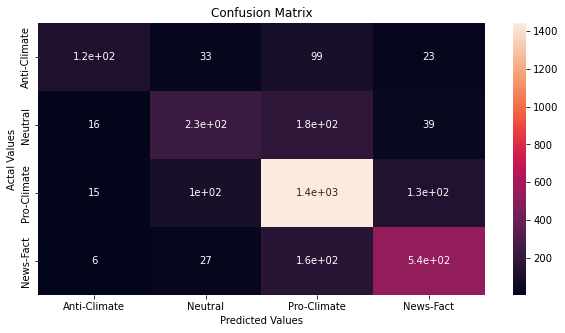

Train accuracy(f1) is: 0.937 and Validation accuracy(f1) is 0.729


In [47]:
# create logistic regression model instance
lm = LogisticRegression(C=2, solver='liblinear')

# fitting and predictiion by calling the 'modelling' fuction 
cm_df_logit, cr_df_logit, cm_logit = modelling(lm)

From the confusion matrix we can see that the model did well at predicting the `Pro-Climate class`. Therefore, we have more correctly predicted `Pro-CLimate` sentiment than others with an accuracy of `81%`

* Generally the model is overfitting having an accuracy score of `94%` in training vs `73%` while predicting unseen dataset


In [36]:
# Create dictionaries for the data we want to log on comet

params = {"random_state": 10,
          "model_type": "lm"
          }
metrics = {"f1": cr_df_logit.loc['f1-score', 'weighted avg'],
           "precision": cr_df_logit.loc['precision', 'weighted avg'],
           "recall": cr_df_logit.loc['recall', 'weighted avg']
           }

In [37]:
# Log our parameters and results on comet
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm_logit)

{'web': 'https://www.comet.ml/api/asset/download?assetId=cb028d16baec4d9a98ef592d2ee30549&experimentKey=c9550c0fcbac4deab2a728be8101aeb6',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=cb028d16baec4d9a98ef592d2ee30549&experimentKey=c9550c0fcbac4deab2a728be8101aeb6',
 'assetId': 'cb028d16baec4d9a98ef592d2ee30549'}

#### b) Support Vector Machine Classifier

A linear model for classification and regression issues is the SVM, or Support Vector Machine. It works well for many real-world issues and can solve both linear and non-linear problems. The SVM concept is straightforward: A line or a hyperplane that divides the data into classes is produced by the algorithm.

Confusion Matrix


Anti-Climate  Neutral  Pro-Climate  News-Fact
Anti-Climate  131           51       80           17       
Neutral       40            237      148          39       
Pro-Climate   46            156      1353         136      
News-Fact     15            52       136          527

Classification Report


Anti-Climate     Neutral  Pro-Climate   News-Fact  accuracy  \
precision  0.564655      0.477823    0.788002     0.732962    0.710493   
recall     0.469534      0.510776    0.800118     0.721918    0.710493   
f1-score   0.512720      0.493750    0.794014     0.727398    0.710493   
support    279.000000    464.000000  1691.000000  730.000000  0.710493   

             macro avg  weighted avg  
precision  0.640861     0.710121      
recall     0.625586     0.710493      
f1-score   0.631971     0.709806      
support    3164.000000  3164.000000

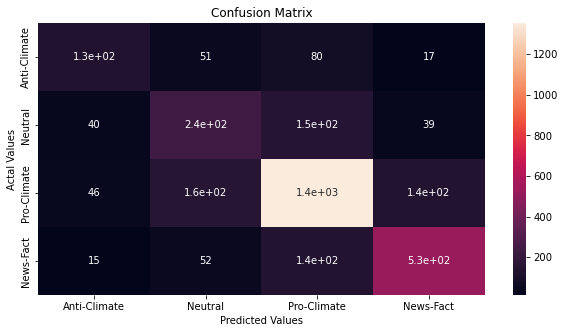

Train accuracy(f1) is: 0.958 and Validation accuracy(f1) is 0.71


In [33]:
#implementing SVC
svc = SVC(kernel='linear')

# fitting and predictiion by calling the 'modelling' fuction 
cm_df_svc, cr_df_svc, cm_svc = modelling(svc)

# loging the confusion matric to comet
#experiment.log_confusion_matrix(matrix=cm)

Generally the model is overfitting having an accuracy score of approximately `96%` in training vs `71%` while predicting unseen dataset

### c)  Decision Tree classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In order to make prediction, the algorithm simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees till it get to the final outcome.

In [34]:
#Inintiate Decision tree
dt=DecisionTreeClassifier(random_state=1)

#initiate a BaggingClassifier called bc consisting of 50 trees
bc=BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1, n_jobs=-1)

Confusion Matrix


Anti-Climate  Neutral  Pro-Climate  News-Fact
Anti-Climate  106           53       95           25       
Neutral       26            227      176          35       
Pro-Climate   60            238      1200         193      
News-Fact     18            79       170          463

Classification Report


Anti-Climate     Neutral  Pro-Climate   News-Fact  accuracy  \
precision  0.504762      0.380235    0.731261     0.646648    0.630847   
recall     0.379928      0.489224    0.709639     0.634247    0.630847   
f1-score   0.433538      0.427898    0.720288     0.640387    0.630847   
support    279.000000    464.000000  1691.000000  730.000000  0.630847   

             macro avg  weighted avg  
precision  0.565726     0.640289      
recall     0.553260     0.630847      
f1-score   0.555528     0.633689      
support    3164.000000  3164.000000

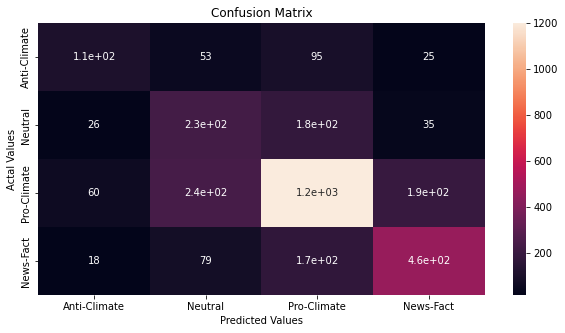

Train accuracy(f1) is: 0.998 and Validation accuracy(f1) is 0.634


In [35]:
cm_df_dt, cr_df_dt, cm_dt = modelling(dt)

From our result, the model performed poorly on unseen data. With the train data, an accuracy score of `99.8%` was recorded but on the test data, we have an accuracy score of `63.4%` which depicts overfitting. 

### Using pipeline

Moving forward to build the rest of our model, we employed techiques like `Pipeline` and `GridsearchCV`.

**Pipeline**

When it comes to orchestrating the flow of data into and output from a machine learning model, a machine learning pipeline comes in handy. It is known as an end-to-end structure that orchestrates the flow of data into and output from a machine learning model is known as a machine learning pipeline (or set of multiple models). It covers the input of the raw data, the features, the outputs, the machine learning model and model parameters, and the outputs of the predictions.

Here, a machine learning pipeline is employed to easy feature extraction from our text data. The pipeline employed executes the following steps in chronological order to extract these features and make predictions. They include:

* Count Vectorization: The CountVectorizer tool in Scikit-learn is used to turn a group of text documents into a vector of term/token counts. Additionally, it enables text data to be pre-processed before being turned into a vector form. Its capabilities turn it into a very versatile feature representation module for text.
&emsp;


* TF-ID Transformer: With TF-ID transformer, a count matrix is transformed into a normalised tf or tf-idf representation. To reduce the impact of tokens that appear often in a corpus, tf-idf is used in place of the raw frequencies of occurrence of a token in a specific document 



* Model: This represents the adopted Machine Learning model


**GridsearchCV**

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters and there is no way to know in advance the best values for hyperparameters. So ideally, we need to try all possible values to know the optimal values. That is why we employ GridSearchCV to automate the tuning of hyperparameters.

### d) Naive Bayes classifier

Mostly employed in Natural Language Processing, the Multinomial Naive Bayes algorithm is a probabilistic learning technique (NLP). The method, which guesses the tag of a text such as an email or newspaper article, is based on the Bayes theorem. For a given sample, it determines the probabilities of each tag, and then outputs the tag with the highest probability.

The Naive Bayes classifier is a collection of many methods, all of which are based on the idea that each feature being classified is independent of every other feature. The existence or absence of one feature has no bearing on the other feature's existence or absence

In [41]:
# split the target and features into train and test
x_train, x_valid, y_train, y_valid = train_test_split(train_df['cleaned_tweet'], train_df.sentiment, test_size=0.2, random_state=10)

Here, we split our dataset again into `Train` and `Validation` set for the purpose of fitting the data into our pipeline

##### Building a pipeline to be more concise

In [39]:
# pipline with naive_bayes and using the 'clean_tweet' from dataset to fit the model
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])
# cross validation
scores = cross_validate(text_clf, train_df['cleaned_tweet'], train_df.sentiment, return_train_score=True)
pd.DataFrame(scores)

fit_time  score_time  test_score  train_score
0  1.198202  0.203175    0.642541    0.712209   
1  0.468698  0.125026    0.640645    0.709759   
2  0.515590  0.062514    0.642225    0.711655   
3  0.359350  0.109367    0.646966    0.706756   
4  0.391676  0.062481    0.636421    0.706621

The model seem to be under performing and overfitting at the same time
- Using GridsearchCV we can find the best hyper-parameters

In [42]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
              'clf__alpha': (1e-2, 1e-3),
             'clf__fit_prior': (True, False)}
nb_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
nb_clf = nb_clf.fit(x_train, y_train)
display('The best accuracy is:',nb_clf.best_score_)
display(nb_clf.best_params_)

# predictions
predicts = nb_clf.predict(x_valid)
cm = confusion_matrix(y_valid,  predicts)
pd.DataFrame(cm, index = sentiment_dict, columns = sentiment_dict)

'The best accuracy is:'

0.710233109442908

{'clf__alpha': 0.01, 'clf__fit_prior': True, 'vect__ngram_range': (1, 2)}

Anti-Climate  Neutral  Pro-Climate  News-Fact
Anti-Climate  104           31       125          19       
Neutral       27            174      228          35       
Pro-Climate   19            68       1453         151      
News-Fact     10            13       178          529

Using our split dataset so we can train on seen data and validate our model with the unseen dataset

In [57]:
# Saving the trained model as a pickle file
Pkl_Filename = "naive_bayes_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(nb_clf, file)

In [58]:
# Create dictionaries for the data we want to log
params = nb_clf.best_params_
metrics = {"f1": nb_clf.best_score_}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm)

The above cells are used to log/commit our model to comet 

### e) K-Neighbors Classifier

Building a pipeline to be more concise

In [43]:
# pipline with naive_bayes and using the 'clean_tweet' from dataset to fit the model
knc_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier()),])
# cross validation
scores = cross_validate(knc_clf, train_df['cleaned_tweet'], train_df.sentiment, return_train_score=True)
pd.DataFrame(scores)

fit_time  score_time  test_score  train_score
0  0.354600  2.208629    0.650759    0.766733   
1  0.328108  1.812369    0.637168    0.762940   
2  0.343710  2.093603    0.663717    0.768708   
3  0.437486  1.781121    0.641909    0.761912   
4  0.359349  1.703025    0.648751    0.762800

The model seem to be under performing and overfitting at the same time
- Using GridsearchCV we can find the best hyper-parameters

In [44]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__n_neighbors': (1, 31)}
knn_clf = GridSearchCV(knc_clf, parameters, n_jobs=-1)
knn_clf = knn_clf.fit(x_train, y_train)
display(f'The best accuracy is: {knn_clf.best_score_}')
display(knn_clf.best_params_)

# predictions
predicts = knn_clf.predict(x_valid)
cm = confusion_matrix(y_valid,  predicts)
pd.DataFrame(cm, index = sentiment_dict, columns = sentiment_dict)

'The best accuracy is: 0.6436981430264718'

{'clf__n_neighbors': 31, 'vect__ngram_range': (1, 1)}

Anti-Climate  Neutral  Pro-Climate  News-Fact
Anti-Climate  57            12       178          32       
Neutral       2             111      315          36       
Pro-Climate   7             36       1487         161      
News-Fact     4             7        283          436

In [61]:
# Saving the trained model as a pickle file
Pkl_Filename = "KNeighborsC_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_clf, file)

In [62]:
# Create dictionaries for the data we want to log

params = knn_clf.best_params_
metrics = {"f1": knn_clf.best_score_}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm)

The above cells are used to log/commit our model to comet 

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In order to evaluate how well our models have performed, we employed the following classification metrics:

* **1. Accuracy**

Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.

* **2. Precision**

Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives.

* **3. Recall**

Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive.

* **4. F1-Score**

It gives a combined idea about Precision and Recall metrics.F1 Score is the harmonic mean of precision and recall.

In [45]:
from sklearn import metrics

In [48]:
# Predicting with each model of choice
lm_preds = lm.predict(X_test) # LogisticRegression
nb_clf_preds = nb_clf.predict(x_valid) # Naive Bayes
knn_clf_preds = knn_clf.predict(x_valid)# K-Neighbors Classifier
svc_preds = svc.predict(X_test) #Linear SVC
#bagg_preds = bc.predict(X_test) #Bagging Classifier
dt_preds = dt.predict(X_test) # Decision Tree Classifier

# creating a map for our model and there prediction array of values
metrics_dict = {"LogisticRegression":lm_preds, "Naive Bayes":nb_clf_preds, "K-Neighbors Classifier":knn_clf_preds,
               "Linear SVC": svc_preds, "Decision Tree Classifier": dt_preds}
metrics_list = [] #initiating a new list to store our metrics value temporarily

# iterating through the dictionary to calculate metrics for each model and make a dataframe off it
for name, prediction in metrics_dict.items():
    f1_score = metrics.f1_score(y_valid, prediction, average="weighted")  
    precision = metrics.precision_score(y_valid, prediction, average="weighted")
    recall = metrics.recall_score(y_valid, prediction, average="weighted")
    metrics_list.append([name, f1_score, precision, recall])
perf_df = pd.DataFrame(metrics_list, columns=["Classifier", "F1_score", "Precision", "Recall"])
perf_df.set_index("Classifier", inplace=True)

In [49]:
# overview of the dataframe created above
perf_df

F1_score  Precision    Recall
Classifier                                             
LogisticRegression        0.729055  0.732702   0.736726
Naive Bayes               0.699177  0.704229   0.714286
K-Neighbors Classifier    0.626688  0.672317   0.660872
Linear SVC                0.709806  0.710121   0.710493
Decision Tree Classifier  0.633689  0.640289   0.630847

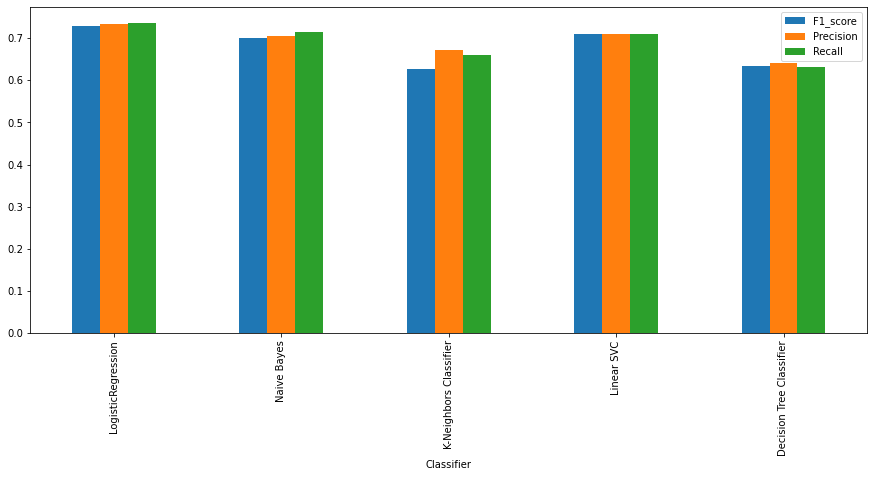

In [50]:
# plotting the metrics complied 
perf_df.plot(kind="bar", figsize=(15,6));

All the Classification metrics point to `Logistic Regression` as the better Model


#### predicting our `test` DataSet with the best model

In [51]:
# Using the fitted (train) model to predict the 'test' dataset
pred_test = lm.predict(test_data_features)

In [52]:
# Saving test predictions to csv file
output = pd.DataFrame({'tweetid': test_df.tweetid,
                       'sentiment': pred_test})
output.to_csv('submission.csv', index=False)

<a id="nine"></a>
## 8. References

          
<a href=#cont>Back to Table of Contents</a>

1. Image 1 : https://businessday.ng/columnist/article/climate-change-time-for-actions/

In [53]:
# ending the comet logging 
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/roceey/edsa-climate-change-belief-analysis/c9550c0fcbac4deab2a728be8101aeb6
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     f1 [3]    : (0.5755037534571316, 0.729054868131763)
COMET INFO:     precision : 0.7327019478753439
COMET INFO:     recall    : 0.7367256637168141
COMET INFO:   Parameters:
COMET INFO:     C                              : 2
COMET INFO:     algorithm                      : auto
COMET INFO:     alpha                          : 0.01
COMET INFO:     class_prior                    : 1
COMET INFO:     class_weight                   : 1
COMET INFO:     clf                            : KNeighborsClassifier(n_neighbors=1)
COMET INFO:     clf__algorithm                 : auto
COMET INFO:     clf__alpha                     : 0.

COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET ERROR: Error sending a notification, make sure you have opted-in for notifications
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: All files uploaded, waiting for confirmation they have been all received
